In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#download data
im_b=np.load(r"C:\Users\anis_\Desktop\modèle cancer detection\data saved with numpy\updated data set\merged_x.npy")
la_b=np.load(r"C:\Users\anis_\Desktop\modèle cancer detection\data saved with numpy\updated data set\merged_y.npy")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    la_b=tf.one_hot(la_b,2)
    la_b=la_b.eval()
print(im_b.shape)
print(la_b.shape)

(13724, 299, 299, 3)
(13724, 2)


In [3]:
test_x_loaded=np.load(r"C:\Users\anis_\Desktop\modèle cancer detection\data saved with numpy\updated data set\test_x.npy")
test_y_loaded=np.load(r"C:\Users\anis_\Desktop\modèle cancer detection\data saved with numpy\updated data set\test_y.npy")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    test_y_loaded=tf.one_hot(test_y_loaded,2)
    test_y_loaded=test_y_loaded.eval()
print(test_x_loaded.shape)
print(test_y_loaded.shape)

(2004, 299, 299, 3)
(2004, 2)


In [4]:
#modeling
model=tf.keras.applications.ResNet50(include_top=False,input_shape=(299,299,3),weights="imagenet")
model.trainable = False
# un-freeze the BatchNorm layers
print(len(model.layers))
'''for layer in model.layers[100:]:
    if "BatchNormalization" in layer.__class__.__name__:
        layer.trainable = True'''
x = tf.keras.layers.Flatten()(model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(2, activation = 'softmax')(x)
model = tf.keras.Model(inputs=model.inputs, outputs=x)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
175
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 305, 305, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
_________

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(im_b, la_b, batch_size=32, epochs=10,validation_data= (test_x_loaded, test_y_loaded))

Train on 13724 samples, validate on 2004 samples
Epoch 1/10
13724/13724 [==============================] - 277s 20ms/sample - loss: 3.0288 - acc: 0.8141 - val_loss: 0.5187 - val_acc: 0.7720
Epoch 2/10
13724/13724 [==============================] - 272s 20ms/sample - loss: 0.3285 - acc: 0.8668 - val_loss: 0.4160 - val_acc: 0.8064
Epoch 3/10
13724/13724 [==============================] - 3873s 282ms/sample - loss: 0.2640 - acc: 0.8882 - val_loss: 0.4427 - val_acc: 0.7874
Epoch 4/10
13724/13724 [==============================] - 271s 20ms/sample - loss: 0.2368 - acc: 0.9029 - val_loss: 0.4475 - val_acc: 0.7884
Epoch 5/10
13724/13724 [==============================] - 271s 20ms/sample - loss: 0.2404 - acc: 0.8939 - val_loss: 0.4921 - val_acc: 0.7630
Epoch 6/10
13724/13724 [==============================] - 272s 20ms/sample - loss: 0.2507 - acc: 0.8834 - val_loss: 0.4366 - val_acc: 0.7879
Epoch 7/10
13724/13724 [==============================] - 272s 20ms/sample - loss: 0.2229 - acc: 0.9013

In [7]:
train_history = model.history.history
train_history

{'loss': [3.028804861997175,
  0.3285052938681586,
  0.26397885869905086,
  0.23681310481977894,
  0.24036298998848962,
  0.2507498395474233,
  0.22292290571713302,
  0.23173295424426482,
  0.20413705501602258,
  0.19484513397381487],
 'acc': [0.81412125,
  0.8668027,
  0.8881521,
  0.9028709,
  0.8939085,
  0.88341594,
  0.9012678,
  0.8934713,
  0.9089916,
  0.91664237],
 'val_loss': [0.518712468727858,
  0.4159955334758568,
  0.44265126016087636,
  0.4475476820906717,
  0.492082674941141,
  0.43657067293178536,
  0.4913775229644395,
  0.7688341249010996,
  0.4667059126014481,
  0.5839338144380414],
 'val_acc': [0.7719561,
  0.80638725,
  0.78742516,
  0.7884232,
  0.762974,
  0.7879242,
  0.7814371,
  0.73303396,
  0.78343314,
  0.7879242]}

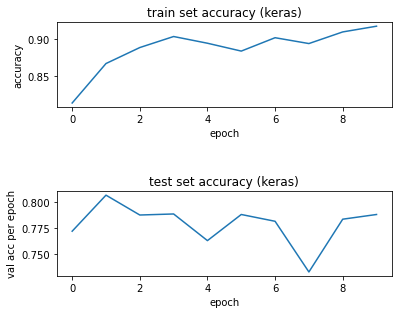

In [10]:
plt.figure(1)
plt.subplot(211)
plt.plot(train_history['acc'])
plt.title('train set accuracy (keras)')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.subplot(212)
plt.plot(train_history['val_acc'])
plt.title('test set accuracy (keras)')
plt.ylabel('val acc per epoch')
plt.xlabel('epoch')
plt.subplots_adjust(left=None, bottom=0, right=None, top=None, wspace=0, hspace=1)
plt.show()

In [8]:
model.save(r"C:\Users\anis_\Desktop\modèle cancer detection\tensorflow\model\first_model.h5")

In [3]:
model = tf.keras.models.load_model(r"C:\Users\anis_\Desktop\modèle cancer detection\tensorflow\model\first_model.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
val_x_loaded=np.load(r"C:\Users\anis_\Desktop\modèle cancer detection\data saved with numpy\1st data set\val_x.npy")
val_y_loaded=np.load(r"C:\Users\anis_\Desktop\modèle cancer detection\data saved with numpy\1st data set\val_y.npy")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    val_y_loaded=tf.one_hot(val_y_loaded,2)
    val_y_loaded=val_y_loaded.eval()
print(val_x_loaded.shape)
print(val_y_loaded.shape)

(7682, 299, 299, 3)
(7682, 2)


In [14]:
print("______prediction_from_validation_set_(keras)______")
for i in range (700,720):
    p= model.predict(np.expand_dims(val_x_loaded[i],0))
    print("prediction of image number "+str(i)+" is "+str(np.argmax(val_y_loaded[i])==np.argmax(p)))

______prediction_from_validation_set_(keras)______
prediction of image number 700 is True
prediction of image number 701 is True
prediction of image number 702 is True
prediction of image number 703 is True
prediction of image number 704 is True
prediction of image number 705 is False
prediction of image number 706 is True
prediction of image number 707 is True
prediction of image number 708 is False
prediction of image number 709 is True
prediction of image number 710 is True
prediction of image number 711 is False
prediction of image number 712 is False
prediction of image number 713 is True
prediction of image number 714 is True
prediction of image number 715 is True
prediction of image number 716 is False
prediction of image number 717 is False
prediction of image number 718 is True
prediction of image number 719 is False
